In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('AAPL1.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...,...
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799057,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969292,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.879601,133587600
2001,2019-12-16,69.250000,70.197502,69.245003,69.964996,69.041557,128186000


In [3]:
df.shape

(2003, 7)

**Visualise some of the attributes of the dataset.**

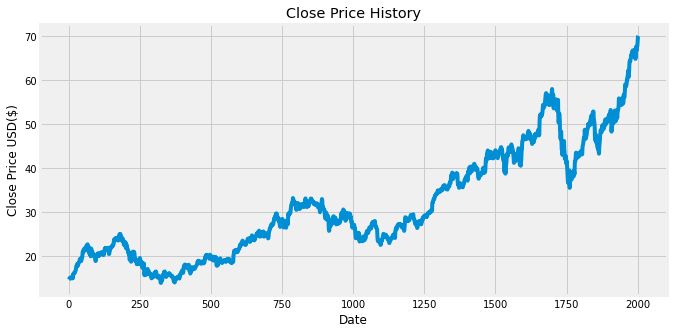

In [4]:
plt.figure(figsize=(10,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price USD($)',fontsize=12)
plt.show()

**Split your whole dataset between training and testing dataset.**

In [16]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.0131651 ],
       [0.01457063],
       [0.01748986],
       ...,
       [0.97658262],
       [0.99755133],
       [1.        ]])

In [18]:
train_data=scaled_data[0:training_data_len,:]
x_train =[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.0131651 , 0.01457063, 0.01748986, 0.02026915, 0.01984304,
       0.02080338, 0.02036454, 0.0196268 , 0.01862192, 0.02173194,
       0.02453667, 0.02367173, 0.01893356, 0.02345549, 0.01900353,
       0.03569839, 0.03440732, 0.03609271, 0.03973694, 0.04194383,
       0.04175942, 0.04107891, 0.04397904, 0.04670743, 0.0497984 ,
       0.05479095, 0.0652785 , 0.0654375 , 0.07127595, 0.07563886,
       0.0681405 , 0.07102789, 0.07097067, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600557, 0.09214292, 0.09661394,
       0.09790501, 0.0983566 , 0.09071196, 0.08886754, 0.08914104,
       0.09632779, 0.09835024, 0.10269409, 0.11293359, 0.12659476,
       0.12403805, 0.12404441, 0.13392141, 0.13701237, 0.1348118 ,
       0.13280208, 0.13070964, 0.13766104, 0.14243104, 0.14442806])]
[0.139492723007876]



In [19]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(1543, 60)

In [20]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

**Predict the stock prices using the following algorithms:**

**1) RNN**

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')

**Add an Evaluation Metrics(any of your choice).**

In [23]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 41s 25ms/step - loss: 9.2846e-04


In [24]:
test_data=scaled_data[training_data_len - 60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [25]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [27]:
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

1.6360970445184817

plot graph after prediction by using different colors to show predicted
stocks. **bold text**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


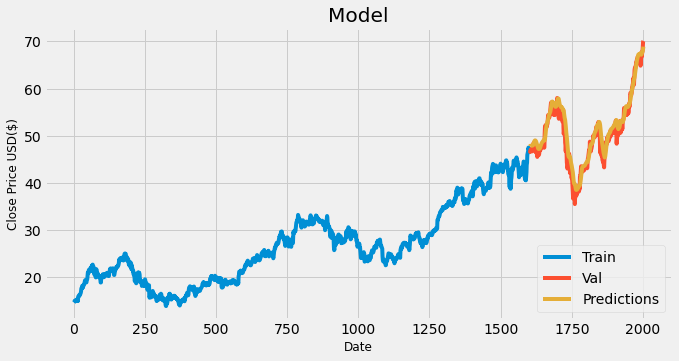

In [30]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price USD($)',fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [31]:
valid

,Close,Predictions
1603,46.747501,47.788097
1604,46.577499,47.881557
1605,46.907501,47.898846
1606,46.790001,47.906975
1607,47.090000,47.896290
...,...,...
1998,67.692497,67.656876
1999,67.864998,67.874260
2000,68.787498,68.114288
2001,69.964996,68.439087


In [33]:
apple_quote=pd.read_csv('AAPL1.csv')
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[69.38647]]


In [34]:
apple_quote2=pd.read_csv('AAPL1.csv')
print(apple_quote2['Close'])

0       14.686786
1       14.765714
2       14.929643
3       15.085714
4       15.061786
          ...    
1998    67.692497
1999    67.864998
2000    68.787498
2001    69.964996
2002    70.102501
Name: Close, Length: 2003, dtype: float64
